[View in Colaboratory](https://colab.research.google.com/github/AvivSham/Reinforcement-Learning/blob/master/MDP_Dopamine_Agent.ipynb)

## **`This code train a built MDP agent from scratch using google's dopamine package`**

---


In [2]:
# @title viewing directories
!ls

sample_data


In [3]:
# @title Install Packages
!pip install --upgrade --no-cache-dir dopamine-rl
!pip install cmake
!pip install atari_py

    100% |████████████████████████████████| 71kB 3.1MB/s 
    100% |████████████████████████████████| 1.5MB 12.8MB/s 
    100% |████████████████████████████████| 1.0MB 15.8MB/s 
  Running setup.py install for gym ... - \ | / done
    100% |████████████████████████████████| 17.7MB 707kB/s 
    100% |████████████████████████████████| 768kB 7.1MB/s 
  Running setup.py bdist_wheel for atari-py ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - 

In [0]:
# @title Import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from dopamine.agents.dqn import dqn_agent
from dopamine.atari import run_experiment
from dopamine.colab import utils as colab_utils
from absl import flags

DIR_PATH = '/tmp/colab_dope_run'
GAME = 'Asterix'

In [0]:
# @title Create a  new MDP agent from scratch.

# define baseline path to store the log data
LOG_PATH = os.path.join(DIR_PATH, 'basic_agent', GAME)

# define the agent's calss
class BasicAgent(object):
  """This agent randomly selects an action and sticks to it. It will change
  actions with probability switch_prob."""
  def __init__(self, sess, num_actions, switch_prob=0.1):
    #tensorflow session
    self._sess = sess
    #how many possible actions can it take?
    self._num_actions = num_actions
    # probability of switching actions in the next timestep?
    self._switch_prob = switch_prob
    #initialize the action to take (randomly)
    self._last_action = np.random.randint(num_actions)
    #not debugging
    self.eval_mode = False
  
   
  #we define our policy here in order to select the sutible action
  def _choose_action(self):
    if np.random.random() <= self._switch_prob:
      self._last_action = np.random.randint(self._num_actions)
    return self._last_action
    
  #when it checkpoints during training, anything we should do?
  def bundle_and_checkpoint(self, unused_checkpoint_dir, unused_iteration):
    pass
    
  #loading from checkpoint
  def unbundle(self, unused_checkpoint_dir, unused_checkpoint_version,
               unused_data):
    pass
  
  #first action to take
  def begin_episode(self, unused_observation):
    return self._choose_action()
  
  #cleanup
  def end_episode(self, unused_reward):
    pass
  
  #we can update our policy here
  #using the reward and observation
  #dynamic programming, Q learning, monte carlo methods, etc.
  def step(self, reward, observation):
    return self._choose_action()
  
def create_basic_agent(sess, environment):
  """The Runner class will expect a function of this type to create an agent."""
  return BasicAgent(sess, num_actions=environment.action_space.n,
                     switch_prob=0.2)

# Create the runner class with this agent.
basic_runner = run_experiment.Runner(LOG_PATH,
                                      create_basic_agent,
                                      game_name=GAME,
                                      num_iterations=600,
                                      training_steps=20,
                                      evaluation_steps=20,
                                      max_steps_per_episode=200)

In [6]:
# @title Running the experiment
basic_runner.run_experiment()
print('The Traning is Done')

INFO:tensorflow:Beginning training...
INFO:tensorflow:Starting iteration 0
INFO:tensorflow:Average undiscounted return per training episode: 200.00
INFO:tensorflow:Average training steps per second: 673.84
INFO:tensorflow:Average undiscounted return per evaluation episode: 300.00
INFO:tensorflow:Starting iteration 1
INFO:tensorflow:Average undiscounted return per training episode: 150.00
INFO:tensorflow:Average training steps per second: 668.38
INFO:tensorflow:Average undiscounted return per evaluation episode: 100.00
INFO:tensorflow:Starting iteration 2
INFO:tensorflow:Average undiscounted return per training episode: 300.00
INFO:tensorflow:Average training steps per second: 666.84
INFO:tensorflow:Average undiscounted return per evaluation episode: 200.00
INFO:tensorflow:Starting iteration 3
INFO:tensorflow:Average undiscounted return per training episode: 100.00
INFO:tensorflow:Average training steps per second: 673.97
INFO:tensorflow:Average undiscounted return per evaluation episod

In [7]:
# @title Load the training logs
agent_data = colab_utils.read_experiment(log_path=LOG_PATH, verbose=True)
agent_data['agent'] = 'BasicAgent'
agent_data['run_number'] = 1


Reading statistics from: /tmp/colab_dope_run/basic_agent/Asterix//logs/log_599


In [8]:
# @title Viewing the loaded logs
agent_data.head()

,iteration,train_episode_returns,eval_episode_returns,agent,run_number
0,0,200,300,BasicAgent,1
1,1,150,100,BasicAgent,1
2,2,300,200,BasicAgent,1
3,3,100,200,BasicAgent,1
4,4,350,250,BasicAgent,1


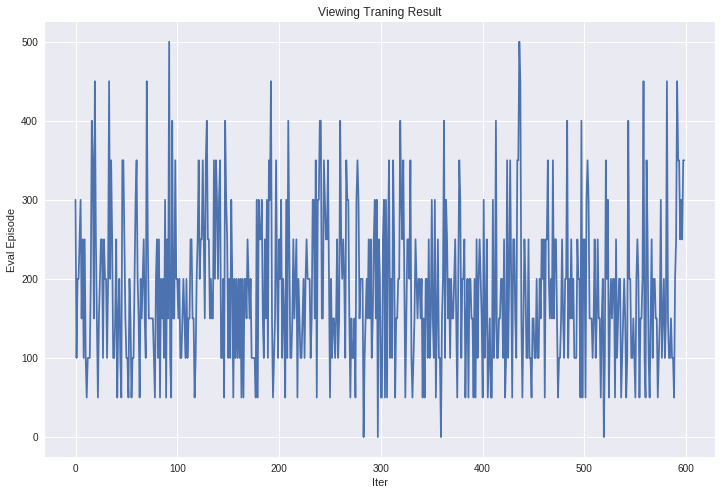

In [12]:
# @title Plotting the results
plt.figure(figsize=(12,8))
plt.plot(agent_data['eval_episode_returns'])
plt.xlabel('Iter')
plt.ylabel('Eval Episode')
plt.title('Viewing Traning Result')
plt.show()